In [1]:
import pandas as pd
from exosyspop.populations import TRILEGAL_BGBinaryPopulation

targets = pd.read_hdf('targets.h5')
bgstars = pd.read_hdf('bgstars.h5')
pop = TRILEGAL_BGBinaryPopulation(targets, bgstars)

import logging
rootLogger = logging.getLogger()

dmag regressor trained, R2=0.980187511763
qR regressor trained, R2=0.970645319441


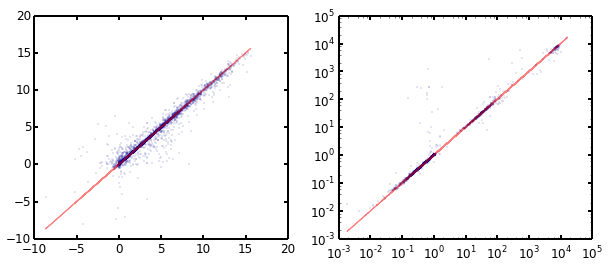

In [2]:
%matplotlib inline
rootLogger.setLevel(logging.INFO)
pop._train_pipelines(n_jobs=8, plot=True)
rootLogger.setLevel(logging.DEBUG)

In [3]:
rootLogger.setLevel(logging.DEBUG)

In [4]:
%timeit pop._define_stars()

DEBUG:root:Defining 34339 background stars.
DEBUG:root:Defining 34359 background stars.
DEBUG:root:Defining 34233 background stars.
DEBUG:root:Defining 34460 background stars.
DEBUG:root:Defining 34377 background stars.
DEBUG:root:Defining 34528 background stars.
DEBUG:root:Defining 34277 background stars.
DEBUG:root:Defining 34701 background stars.
DEBUG:root:Defining 34553 background stars.
DEBUG:root:Defining 34247 background stars.
DEBUG:root:Defining 34040 background stars.
DEBUG:root:Defining 34265 background stars.
DEBUG:root:Defining 34177 background stars.
DEBUG:root:Defining 34432 background stars.
DEBUG:root:Defining 34058 background stars.
DEBUG:root:Defining 34295 background stars.
DEBUG:root:Defining 33954 background stars.
DEBUG:root:Defining 34220 background stars.
DEBUG:root:Defining 34187 background stars.
DEBUG:root:Defining 34126 background stars.
DEBUG:root:Defining 34266 background stars.
DEBUG:root:Defining 34502 background stars.
DEBUG:root:Defining 34063 backgr

10 loops, best of 3: 129 ms per loop


In [6]:
%timeit pop._generate_binaries()

1 loops, best of 3: 307 ms per loop


In [7]:
%timeit pop._generate_orbits()

The slowest run took 5.38 times longer than the fastest. This could mean that an intermediate result is being cached 
1 loops, best of 3: 146 ms per loop


In [6]:
obs = pop.observe(new=True)

DEBUG:root:Generating binary companions for 34290 stars...
DEBUG:root:Generating orbits for 34290 stars...
DEBUG:root:61 orbits assigned to ecc=rayleigh(0.03)
DEBUG:root:47 orbits assigned to ecc=0


In [12]:
df = obs.copy()

In [13]:
df.rename({'period':'period'}, dtype=int, inplace=True)
df.head()

TypeError: rename() got an unexpected keyword argument "dtype"

In [11]:
obs[['period','d_pri','d_sec','n_pri','n_sec']]

,period,d_pri,d_sec,n_pri,n_sec
0,85.994363,1.270542e-05,2.961794e-11,9,11
1,1.211639,8.283539e-03,9.313264e-03,1061,1044
2,8.272804,1.339625e-03,0.000000e+00,122,0
3,50.437796,9.535256e-05,4.353680e-06,21,16
4,569.283218,0.000000e+00,1.363251e-05,0,2
5,7.261835,2.466338e-06,1.211085e-05,178,177
6,208.106460,1.542740e-04,1.898273e-04,6,7
7,66.555250,2.628482e-07,0.000000e+00,16,0
8,1.238497,1.093851e-04,1.111254e-04,1040,1003
9,17.155542,0.000000e+00,6.437796e-06,0,58


In [9]:
len(obs)

319

In [27]:
df = pop.stars.copy()

In [28]:
df.tra.

136695    False
135710    False
117013    False
99556     False
170231    False
64229     False
7444      False
2942      False
126131    False
31223     False
24030     False
42635     False
102263    False
45330     False
57910     False
87585     False
162941    False
63593     False
26037     False
63250     False
29434     False
67735     False
32257     False
91463     False
102723    False
160324    False
115556    False
69251     False
86016     False
10415     False
          ...  
17367     False
88296     False
152543    False
141962    False
51452     False
16769     False
122207    False
39640     False
29306     False
30881     False
30697     False
175056    False
59846     False
35205     False
172701    False
87865     False
156212    False
20349     False
24921     False
133856    False
140555    False
115585    False
174019    False
41364     False
94505     False
37487     False
65467     False
141829    False
121867    False
147282    False
Name: tra, dtype: bool

In [24]:
pop.tra.sum()

266.0

In [12]:
len(pop.stars)

34332

In [15]:
len(pop.stars['d_pri'].values)

34332

In [20]:
'd_pri' in pop._not_calculated

True

In [21]:
'd_pri' in pop.orbital_props

True

In [19]:
pop._not_calculated

['period',
 'ecc',
 'w',
 'inc',
 'a',
 'aR',
 'b_pri',
 'b_sec',
 'k',
 'tra',
 'occ',
 'd_pri',
 'd_sec',
 'T14_pri',
 'T14_sec',
 'T23_pri',
 'T23_sec']

In [21]:
pop.period

array([  1.94496999e+02,   1.41581623e+04,   2.73116490e+01, ...,
         4.04700099e+06,   2.66557261e+04,   2.19053093e+02])

In [8]:
pop._define_stars()

In [9]:
len(pop.tra)

DEBUG:root:Generating binary companions for 34275 stars...
DEBUG:root:Generating orbits for 34275 stars...
DEBUG:root:75 orbits assigned to ecc=rayleigh(0.03)
DEBUG:root:57 orbits assigned to ecc=0


ValueError: operands could not be broadcast together with shapes (33966,) (34275,) (33966,) 

In [15]:
len(pop.flux_ratio)

33815

In [10]:
pop.period

DEBUG:root:Generating orbits for 34275 stars...
DEBUG:root:64 orbits assigned to ecc=rayleigh(0.03)
DEBUG:root:45 orbits assigned to ecc=0


ValueError: operands could not be broadcast together with shapes (33966,) (34275,) (33966,) 

In [8]:
len(pop.period)

34338

In [10]:
len(pop.radius_B)

34338

In [11]:
pop._generate_binaries()

In [12]:
pop.period

array([  2.64314194e+02,   4.68885045e+00,   2.35436461e+02, ...,
         2.15864286e+06,   6.38365552e+03,   5.63384638e+05])

In [19]:
pop._define_stars()

In [20]:
pop.N

34579

In [21]:
len(pop.stars)

34579

In [26]:
len(pop.d_pri)

34338

In [28]:
'd_pri' in pop._not_calculated

True

In [29]:
len(pop._star_cache)

34579

In [30]:
len(pop._index)

34579

In [27]:
'd_pri' in pop.orbital_props

True

In [23]:
pop._not_calculated

['mass_B',
 'radius_B',
 'flux_ratio',
 'period',
 'ecc',
 'w',
 'inc',
 'a',
 'aR',
 'b_pri',
 'b_sec',
 'k',
 'tra',
 'occ',
 'd_pri',
 'd_sec',
 'T14_pri',
 'T14_sec',
 'T23_pri',
 'T23_sec']

In [16]:
pop.period

ValueError: operands could not be broadcast together with shapes (34338,) (34579,) (34338,) 

In [7]:
%timeit pop._generate_binaries()

1 loops, best of 3: 295 ms per loop


In [8]:
%timeit pop._generate_orbits()

10 loops, best of 3: 82.5 ms per loop


In [9]:
%timeit pop._define_stars()

10 loops, best of 3: 120 ms per loop


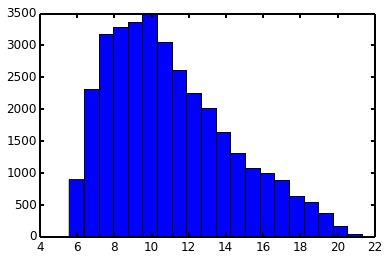

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.hist(pop.b_target, bins=20);

In [14]:
len(pop.target_mag)

34182

In [16]:
len(pop.stars.target_mag)

34182

In [18]:
len(pop.stars.Kepler_mag)

34182

In [20]:
pop._generate_binaries()

In [23]:
pop.flux_ratio

array([ 0.        ,  0.57923069,  0.        , ...,  0.        ,
        0.        ,  0.54295226])

In [30]:
pop._define_stars()

In [31]:
pop._not_calculated

['mass_B',
 'radius_B',
 'flux_ratio',
 'period',
 'ecc',
 'w',
 'inc',
 'a',
 'aR',
 'b_pri',
 'b_sec',
 'k',
 'tra',
 'occ',
 'd_pri',
 'd_sec',
 'T14_pri',
 'T14_sec',
 'T23_pri',
 'T23_sec']

In [32]:
pop.flux_ratio

array([ 0.83702842,  0.        ,  0.        , ...,  0.10005448,
        0.        ,  0.14975393])

In [33]:
pop._not_calculated

['period',
 'ecc',
 'w',
 'inc',
 'a',
 'aR',
 'b_pri',
 'b_sec',
 'k',
 'tra',
 'occ',
 'd_pri',
 'd_sec',
 'T14_pri',
 'T14_sec',
 'T23_pri',
 'T23_sec']

In [36]:
pop.period

array([ 11021.52537402,   1660.53071248,     17.18135333, ...,
         2838.88530808,   7222.03006546,   7857.89083491])

In [37]:
pop._define_stars()

In [39]:
pop.period

array([  1.56755125e+04,   2.49027838e+02,   3.02022528e+00, ...,
         2.52893195e+06,   4.43991881e+01,   2.79233964e+02])

In [40]:
len(pop.stars)

34441

In [41]:
pop._define_stars()
len(pop.stars)

34352

In [42]:
len(pop.dilution_factor)

34352

In [43]:
len(pop.d_pri)

34161

In [44]:
pop._not_calculated

['mass_B',
 'radius_B',
 'flux_ratio',
 'period',
 'ecc',
 'w',
 'inc',
 'a',
 'aR',
 'b_pri',
 'b_sec',
 'k',
 'tra',
 'occ',
 'd_pri',
 'd_sec',
 'T14_pri',
 'T14_sec',
 'T23_pri',
 'T23_sec']